<img style="padding-right: 10px;" src='https://i.ibb.co/vmVvrPF/ta-logo1.png' width="45" height="45" align="left"><BR CLEAR=ALL />
<font size=7 align='center' face='fantasy'>Scraping all Restaurant Listings from <font color=#33E0A1>TripAdvisor</font>
    for <font color=#728FCE> a given City</font> Using Python</font><BR CLEAR=ALL /><br>
<font color=grey size=5 align='left' face='sans'>Using BeautifulSoup, Requests, Seaborn, and Pandas</font><br>
<img src='https://i.ibb.co/vz53r88/restt.jpg' width="1000" height="1000" align="left" style="border:10px grey;">


<font size=5 align='left'><img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
          <b>Web Scraping using Python</b>
</font><br>
<font size=3 align='left'>
Using web scraping, we can extract data like product prices, ratings and other types of information from websites. We can then use this data for various purposes like data analysis, research, business intelligence, and data science. In Python, web scraping is often done using libraries like Beautiful Soup, Scrapy, and Requests, which make it easier to retrieve and parse data from web pages.
</font>

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
          <b>But wait, this is not just another scraping project!</b>
  </p>
</font>
<font size=3 align='left'> 
This project aims to scrape restaurant details from any city in any country, along with a <font color=red>tadka</font> of Exploratory Data Analysis from the scraped data. If this doesn't make you the pundit of web scraping using Python, what will? ;)
</font>
<img src='https://s3.memeshappen.com/memes/wow--meme-10622.jpg' width="200" height="200" align="center">

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left"> 
     <b>How would the scraped csv look like?</b></p>
</font>
<font size=3 align='left'>   
The scraped restaurant data would contain:
<ul>
    <b><li><font color=#F36530>Name of the Restaurant</font></li>
        <li><font color=#F36530>Total Reviews</font></li>
        <li><font color=#F36530>Star/Bubble Rating</font></li>
        <li><font color=#F36530>Cuisines</font></li></b>
</ul>
Other useful information that can be used for debugging includes page number, restaurant serial number, and data offset.

<img src="https://i.ibb.co/tM6t1NS/csv-screenshot.png" width="750" height ="750">

The above sample is of Berlin, Germany.
</font>

<img src='https://i.ibb.co/wKTTTFh/153783366-lets-start-inscription-handwritten-lettering-illustration-black-vector-text-in-speech-bubb.png' width="300" height="300" align="center">

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left"> 
     <b>Control Variable/Input Parameters</b></p>
</font>

<font size=3 align='left'> 
    <p>
In this project, we have selected Berlin, Germany. For example, if we wish to scrape all restaurants in Bangalore, Karnataka, we will filter the same on Tripadvisor, and we will get a link that would look something like this:<br></br>
<font color='deep pink'>"https://www.tripadvisor.in/Restaurants-g297628-Bengaluru_Bangalore_District_Karnataka.html".</font><br></br>
        In this link, "297628" is the geo-code, and "Bengaluru_Bangalore_District_Karnataka" is the city name. If we notice, on Tripadvisor, it shows around 11,127 restaurants for Bengaluru. So now, our input parameters would be:
<ul>
    <b><li><font color=#F36530>Geo Code</font></li>
        <li><font color=#F36530>City Name</font></li>
        <li><font color=#F36530>Upper Data Offset</font></li>
</ul>
    </p>
</font>
</br>

<font size=3 align='left'>
Now that we have selected a city along with its geo-code of our choice, let's proceed with the script. <br></br> The first step is to import the required libraries. (Install if needed.)
The next step is to define the control variables. Since we will be scraping restaurant data from Berlin, Germany, we will define the variables accordingly. Also, there are a total of 30 restaurants listed per page on TripAdvisor, which constitutes our page size. The last page has the data  offset of 6330, which would be our data offset upper limit. <br></br>
These control variables will change according to the city we are trying to scrape.

In [1]:
pip install "requests_html"

     |████████████████████████████████| 83 kB 2.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 50 kB 8.6 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 106 kB 17.6 MB/s            
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=6f20523435099eac293b8c9cf084ec92e3c6871cf8b6e1d3bfd53a8875537f8f
  Stored in directory: /home/jovyan/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=44cc452f2dbdc6ec6104bf8ed7d9b83294ee3c0d8c52586d2134891426b77362
  Stored in directory: /home/jovyan/.cache/pip/wheels/d6/9c/58/ee3ba36897e890f3ad81e9b730791a153fce20caa4a8a474df
Successfully built bs4 parse
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install "bs4"

Note: you may need to restart the kernel to use updated packages.


In [42]:
# pip install "requests.html"

# Import Libraries
import requests
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import pandas as pd
import functools
import time

# store the url in a variable
scraping_control_variables = {
    "city_name": "Berlin",
    "geo_code": "187323",
    "data_offset_lower_limit": 0,
    "data_offset_upper_limit": 6330,
    "starting_page_num": 0,
    "page_size": 30,
}

<font size=3 align='left'> There are a total of 11 functions that will be used in this script.
<ul>
    <li><font size = 3 color=teal>get_url</font></li>
    <li><font size = 3 color=teal>get_soup_content</font></li>
    <li><font size = 3 color=teal>get_card</font></li>
    <li><font size = 3 color=teal>parse_tripadvisor</font></li>
    <li><font size = 3 color=teal>get_parsed_restaurant_data_for_page</font></li>
    <li><font size = 3 color=teal>get_restaurant_data_from_card</font></li>
    <li><font size = 3 color=teal>scrape_star_ratings</font></li>
    <li><font size = 3 color=teal>scrape_reviews</font></li>
    <li><font size = 3 color=teal>scrape_cuisines</font></li>
    <li><font size = 3 color=teal>scrape_title</font></li>
    <li><font size = 3 color=teal>save_to_csv</font></li>
</ul>
    Let's go through each function one by one.
</font>
  

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left"> 
     <b>get_url</b></p>
</font>
<font size=3 align='left'> 
    <font color = teal>get_url</font> takes geo-code, data offset, and city name as inputs and creates a different url for every page to be scraped. The url follows a pattern as the data offset is a multiple of 30. For Example,<br>
    <p STYLE="text-transform:lowercase">
        <a href="url">https://www.tripadvisor.in/Restaurants-g187323-oa90-Berlin.html#EATERY_LIST_CONTENTS<br></a>
        <a href="url">https://www.tripadvisor.in/Restaurants-g187323-oa120-Berlin.html#EATERY_LIST_CONTENTS<br></a>
        <a href="url">https://www.tripadvisor.in/Restaurants-g187323-oa150-Berlin.html#EATERY_LIST_CONTENTS</br></a>
    </p>
    
</font>
</br>

In [43]:
# Function to get URL for every page

def get_url(gc, do, city):
    data_offset_var = "-oa" + str(do)
    if do == 0:
        data_offset_var = ""
    url = f"https://www.tripadvisor.in/RestaurantSearch-g{gc}{data_offset_var}-a_date.2023__2D__03__2D__05-a_people.2-a_time.20%3A00%3A00-a_zur.2023__5F__03__5F__05-{city}.html#EATERY_LIST_CONTENTS"
    print("URL to be scraped: ", "\n", url, "\n")
    return url

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left"> 
     <b>get_soup_content</b></p>
</font>
<font size=3 align='left'> 
<font color = teal>get_soup_content</font> takes geo-code, data-offset and city name as an input to call get_url function. Also, it creates a response object using the url obtained. Once the HTML is accessible, we need to parse the HTML and load it into a BS4 structure. This soup object is very handy and allows us to access useful pieces of information such as title, cuisines, ratings etc.
</font>

In [44]:
# Function to get soup content

def get_soup_content(gc, city, do):
    url = get_url(gc, do, city)
    # start the HTML session
    print("HTML session started")
    r = HTMLSession()
    response_obj = r.get(url, verify=False)
    soup_content = BeautifulSoup(response_obj.content, "html.parser")
    return soup_content

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>get_card</b>
  </p>
</font>
<font size=3 align='left'> 
The <font color = teal>get_card </font> function will help in getting the individual restaurant cards according to the restaurant serial number or restaurant count. The card tags follow this pattern: 1_list_item, 2_list_item, 3_list_item, etc.<br>
*Screenshot for reference*
</font>
<img src="https://i.ibb.co/cg2BN3w/ccardd.png" width = "1000" height = "600"  >

In [45]:
def get_card(rest_cnt, soup_content):
    card_tag = f"{rest_cnt}_list_item"
    print(f"Scraping item number: {card_tag}")
    card = soup_content.find("div", {"data-test": card_tag})
    return card

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>parse_tripadvisor and get_parsed_restaurant_data_for_page</b>
  </p>
</font>
<font size=3 align='left'> 
The <font color = teal>parse_tripadvisor</font> function takes scraping control variables(scv) defined in the earlier steps as an input. This is one of the most important functions in the script. We have declared an empty list, restaurants_scraped which will store all the restaurant listings listed for Berlin.<br> 
    current_data_offset = 0 (data_offset_lower_limit)<br>
    current_page_number = 0 (starting_page_num)<br>
 Now the loop runs starting from 0 untill 6330 (data_offset_upper_limit). For the first page, page number would be 0 and the <font color = teal>get_soup_content</font> gets the html for the first page which has the current_data_offset as 0.<br>
    
The <font color = teal>get_parsed_restaurant_data_for_page</font> takes the current_page_number as 0, scv["page_size"] as 30, soup_content(obtained above), and current_data_offset as 0.
<font color = teal>get_restaurant_data_from_card</font> gets restaurant details like title, ratings, cuisines, reviews using individual restaurant cards based on the rest_cnt. The list, parsed_restaurant_data_for_page obtained is added to the empty list, restaurants_scraped.
Since we can't be completely sure if the page would contain fewer than 30 restaurants, we have also included the if condition inside the loop for the function <font color = teal>get_parsed_restaurant_data_for_page</font>, which takes care of that.
</font></br>

In [46]:
# scrape & parse restaurants pagewise till data_offset_upper_limit is reached
def parse_tripadvisor(scv):
    restaurants_scraped = []
    current_data_offset, current_page_number = scv["data_offset_lower_limit"],scv["starting_page_num"]
    while current_data_offset <= scv["data_offset_upper_limit"]:
        print(f"Scraping started for Page Number: {current_page_number} with Dataoffset: {current_data_offset}\n")
        soup_content = get_soup_content(scv["geo_code"], scv["city_name"], current_data_offset)
        page_restaurant_data = get_parsed_restaurant_data_for_page(current_page_number, scv["page_size"], soup_content, current_data_offset)
        restaurants_scraped += page_restaurant_data
        print(f"Scraping completed for Page Number: {current_page_number} with Dataoffset: {current_data_offset}\n")
        current_page_number = current_page_number + 1
        current_data_offset = current_data_offset + 30
    return restaurants_scraped

In [47]:
# Iterate over page's soup_content to parse all cards and give a list parsed_restaurant_data_for_page having card_restaurant_data
def get_parsed_restaurant_data_for_page(page_num, page_size, soup_content, current_data_offset):
    page_start_offset = (page_num * page_size) + 1
    page_end_offset = page_start_offset + page_size
    parsed_restaurant_data_for_page = []
    for rest_cnt in range(page_start_offset, page_end_offset):
        card = get_card(rest_cnt, soup_content)
        if card is None:
            break
        card_restaurant_data = get_restaurant_data_from_card(card, rest_cnt, current_data_offset, page_num)
        parsed_restaurant_data_for_page.append(card_restaurant_data)
    return parsed_restaurant_data_for_page

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>get_restaurant_data_from_card</b>
  </p>
</font>
<font size=3 align='left'>
<font color = teal>get_restaurant_data_from_card</font> function takes the restaurant count, current data offset, page number, and card number as input and calls individual scrape functions created to get restaurant details. 
</font>

In [48]:
def get_restaurant_data_from_card(card, rest_cnt, current_data_offset, page_num):
    restaurant_data = {
        "title": scrape_title(card),
        "cuisines": scrape_cuisines(card),
        "reviews": scrape_reviews(card),
        "star rating": scrape_star_ratings(card),
        "page number": page_num,
        "data offset": current_data_offset,
        "restaurant serial number": rest_cnt,
    }

    return restaurant_data

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>Scraping Functions to get Restaurant Details</b>
  </p>
</font>
<font size=3 align='left'>
All the below functions take the card as input which contain all information pertaining to a particular restauarant.<br>
<font color = teal>scrape_star_ratings</font> - gets the star/customer rating of the restaurant.<br>
<font color = teal>scrape_reviews</font> - gets the total reviews of the restaurant.<br>
<font color = teal>scrape_cuisines</font> - gets all the cuisines offered by the restaurant.<br>
<font color = teal>scrape_title</font> - gets the name of the restaurant.<br>
</font>
<font size=3 align='left'><b>
    <ul>
    <li>Title:</li>
        <img src="https://i.ibb.co/B2PQYc3/title-tag.png" width = "400" height = "300" align = "left" ><BR CLEAR=ALL /><br>
    <li>Ratings</li>
        <img src="https://i.ibb.co/RQwTJcC/rating-tag.png" width = "1000" height = "300" align = "left"><BR CLEAR=ALL /><br>
    <li>Reviews</li>
        <img src="https://i.ibb.co/Tct2tpG/reviews-tag.png" width = "400" height = "300" align = "left"><BR CLEAR=ALL /><br>
    <li>Cuisines</li>
        <img src="https://i.ibb.co/CQj13vq/cuisines-tag.png" width = "400" height = "300" align = "left">
    </ul>
 </font>


In [49]:
def scrape_star_ratings(card):
    star_rating = card.find_all("svg", class_="UctUV d H0")
    scraped_star_ratings = (star_rating[0]["aria-label"] if len(star_rating) >= 1 else None)
    return scraped_star_ratings


def scrape_reviews(card):
    reviews = card.find_all("span", class_="IiChw")
    scraped_reviews = reviews[-1].text if len(reviews) >= 1 else None
    return scraped_reviews


def scrape_cuisines(card):
    cu_1 = card.find("div", class_="hBcUX XFrjQ mIBqD")
    try:
        cu = cu_1.find("span", class_="SUszq").get_text()
    except AttributeError:
        cu = None
    return cu


def scrape_title(card):
    title = card.find_all("div", class_="RfBGI")
    scraped_title = None if len(title) < 1 else title[0].text
    return scraped_title

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>Saving the scraped file as a CSV</b>
  </p>
</font>
<font size=3 align='left'>
Finally, let's save the dataframe as a csv in our local repository, and we are done! This csv can be used for any data analysis and data science projects.
</font>

In [50]:
def save_to_csv(restaurants_scraped):
    # finally, store the output into a csv file
    print("storing the data in csv")
    output_df = pd.DataFrame(restaurants_scraped)
    print(output_df.head(50))
#     output_df.drop_duplicates(inplace=True)
    output_df.to_csv("ta_berlin_restaurants_scraped.csv", index= False)
    print("csv stored")

In [51]:
def scrape_and_save(scraping_control_variables):
    restaurants_scraped = parse_tripadvisor(scraping_control_variables)
    save_to_csv(restaurants_scraped)
    return restaurants_scraped

In [52]:
# disable secure certificate warnings
requests.packages.urllib3.disable_warnings()
restaurants_scraped = scrape_and_save(scraping_control_variables)

# Print Dataframe
scraped_df = pd.DataFrame(restaurants_scraped)
print("Reastaurant Data Scraped:\n",scraped_df.head(20) )

Scraping started for Page Number: 0 with Dataoffset: 0

URL to be scraped:  
 https://www.tripadvisor.in/RestaurantSearch-g187323-a_date.2023__2D__03__2D__05-a_people.2-a_time.20%3A00%3A00-a_zur.2023__5F__03__5F__05-Berlin.html#EATERY_LIST_CONTENTS 

HTML session started
Scraping item number: 1_list_item
Scraping item number: 2_list_item
Scraping item number: 3_list_item
Scraping item number: 4_list_item
Scraping item number: 5_list_item
Scraping item number: 6_list_item
Scraping item number: 7_list_item
Scraping item number: 8_list_item
Scraping item number: 9_list_item
Scraping item number: 10_list_item
Scraping item number: 11_list_item
Scraping item number: 12_list_item
Scraping item number: 13_list_item
Scraping item number: 14_list_item
Scraping item number: 15_list_item
Scraping item number: 16_list_item
Scraping item number: 17_list_item
Scraping item number: 18_list_item
Scraping item number: 19_list_item
Scraping item number: 20_list_item
Scraping item number: 21_list_item
Sc

Scraping item number: 181_list_item
Scraping item number: 182_list_item
Scraping item number: 183_list_item
Scraping item number: 184_list_item
Scraping item number: 185_list_item
Scraping item number: 186_list_item
Scraping item number: 187_list_item
Scraping item number: 188_list_item
Scraping item number: 189_list_item
Scraping item number: 190_list_item
Scraping item number: 191_list_item
Scraping item number: 192_list_item
Scraping item number: 193_list_item
Scraping item number: 194_list_item
Scraping item number: 195_list_item
Scraping item number: 196_list_item
Scraping item number: 197_list_item
Scraping item number: 198_list_item
Scraping item number: 199_list_item
Scraping item number: 200_list_item
Scraping item number: 201_list_item
Scraping item number: 202_list_item
Scraping item number: 203_list_item
Scraping item number: 204_list_item
Scraping item number: 205_list_item
Scraping item number: 206_list_item
Scraping item number: 207_list_item
Scraping item number: 208_li

Scraping item number: 361_list_item
Scraping item number: 362_list_item
Scraping item number: 363_list_item
Scraping item number: 364_list_item
Scraping item number: 365_list_item
Scraping item number: 366_list_item
Scraping item number: 367_list_item
Scraping item number: 368_list_item
Scraping item number: 369_list_item
Scraping item number: 370_list_item
Scraping item number: 371_list_item
Scraping item number: 372_list_item
Scraping item number: 373_list_item
Scraping item number: 374_list_item
Scraping item number: 375_list_item
Scraping item number: 376_list_item
Scraping item number: 377_list_item
Scraping item number: 378_list_item
Scraping item number: 379_list_item
Scraping item number: 380_list_item
Scraping item number: 381_list_item
Scraping item number: 382_list_item
Scraping item number: 383_list_item
Scraping item number: 384_list_item
Scraping item number: 385_list_item
Scraping item number: 386_list_item
Scraping item number: 387_list_item
Scraping item number: 388_li

Scraping item number: 541_list_item
Scraping item number: 542_list_item
Scraping item number: 543_list_item
Scraping item number: 544_list_item
Scraping item number: 545_list_item
Scraping item number: 546_list_item
Scraping item number: 547_list_item
Scraping item number: 548_list_item
Scraping item number: 549_list_item
Scraping item number: 550_list_item
Scraping item number: 551_list_item
Scraping item number: 552_list_item
Scraping item number: 553_list_item
Scraping item number: 554_list_item
Scraping item number: 555_list_item
Scraping item number: 556_list_item
Scraping item number: 557_list_item
Scraping item number: 558_list_item
Scraping item number: 559_list_item
Scraping item number: 560_list_item
Scraping item number: 561_list_item
Scraping item number: 562_list_item
Scraping item number: 563_list_item
Scraping item number: 564_list_item
Scraping item number: 565_list_item
Scraping item number: 566_list_item
Scraping item number: 567_list_item
Scraping item number: 568_li

Scraping item number: 721_list_item
Scraping item number: 722_list_item
Scraping item number: 723_list_item
Scraping item number: 724_list_item
Scraping item number: 725_list_item
Scraping item number: 726_list_item
Scraping item number: 727_list_item
Scraping item number: 728_list_item
Scraping item number: 729_list_item
Scraping item number: 730_list_item
Scraping item number: 731_list_item
Scraping item number: 732_list_item
Scraping item number: 733_list_item
Scraping item number: 734_list_item
Scraping item number: 735_list_item
Scraping item number: 736_list_item
Scraping item number: 737_list_item
Scraping item number: 738_list_item
Scraping item number: 739_list_item
Scraping item number: 740_list_item
Scraping item number: 741_list_item
Scraping item number: 742_list_item
Scraping item number: 743_list_item
Scraping item number: 744_list_item
Scraping item number: 745_list_item
Scraping item number: 746_list_item
Scraping item number: 747_list_item
Scraping item number: 748_li

Scraping item number: 901_list_item
Scraping item number: 902_list_item
Scraping item number: 903_list_item
Scraping item number: 904_list_item
Scraping item number: 905_list_item
Scraping item number: 906_list_item
Scraping item number: 907_list_item
Scraping item number: 908_list_item
Scraping item number: 909_list_item
Scraping item number: 910_list_item
Scraping item number: 911_list_item
Scraping item number: 912_list_item
Scraping item number: 913_list_item
Scraping item number: 914_list_item
Scraping item number: 915_list_item
Scraping item number: 916_list_item
Scraping item number: 917_list_item
Scraping item number: 918_list_item
Scraping item number: 919_list_item
Scraping item number: 920_list_item
Scraping item number: 921_list_item
Scraping item number: 922_list_item
Scraping item number: 923_list_item
Scraping item number: 924_list_item
Scraping item number: 925_list_item
Scraping item number: 926_list_item
Scraping item number: 927_list_item
Scraping item number: 928_li

Scraping item number: 1079_list_item
Scraping item number: 1080_list_item
Scraping completed for Page Number: 35 with Dataoffset: 1050

Scraping started for Page Number: 36 with Dataoffset: 1080

URL to be scraped:  
 https://www.tripadvisor.in/RestaurantSearch-g187323-oa1080-a_date.2023__2D__03__2D__05-a_people.2-a_time.20%3A00%3A00-a_zur.2023__5F__03__5F__05-Berlin.html#EATERY_LIST_CONTENTS 

HTML session started
Scraping item number: 1081_list_item
Scraping item number: 1082_list_item
Scraping item number: 1083_list_item
Scraping item number: 1084_list_item
Scraping item number: 1085_list_item
Scraping item number: 1086_list_item
Scraping item number: 1087_list_item
Scraping item number: 1088_list_item
Scraping item number: 1089_list_item
Scraping item number: 1090_list_item
Scraping item number: 1091_list_item
Scraping item number: 1092_list_item
Scraping item number: 1093_list_item
Scraping item number: 1094_list_item
Scraping item number: 1095_list_item
Scraping item number: 1096

Scraping item number: 1261_list_item
Scraping item number: 1262_list_item
Scraping item number: 1263_list_item
Scraping item number: 1264_list_item
Scraping item number: 1265_list_item
Scraping item number: 1266_list_item
Scraping item number: 1267_list_item
Scraping item number: 1268_list_item
Scraping item number: 1269_list_item
Scraping item number: 1270_list_item
Scraping item number: 1271_list_item
Scraping item number: 1272_list_item
Scraping item number: 1273_list_item
Scraping item number: 1274_list_item
Scraping item number: 1275_list_item
Scraping item number: 1276_list_item
Scraping item number: 1277_list_item
Scraping item number: 1278_list_item
Scraping item number: 1279_list_item
Scraping item number: 1280_list_item
Scraping item number: 1281_list_item
Scraping item number: 1282_list_item
Scraping item number: 1283_list_item
Scraping item number: 1284_list_item
Scraping item number: 1285_list_item
Scraping item number: 1286_list_item
Scraping item number: 1287_list_item
S

Scraping item number: 1441_list_item
Scraping item number: 1442_list_item
Scraping item number: 1443_list_item
Scraping item number: 1444_list_item
Scraping item number: 1445_list_item
Scraping item number: 1446_list_item
Scraping item number: 1447_list_item
Scraping item number: 1448_list_item
Scraping item number: 1449_list_item
Scraping item number: 1450_list_item
Scraping item number: 1451_list_item
Scraping item number: 1452_list_item
Scraping item number: 1453_list_item
Scraping item number: 1454_list_item
Scraping item number: 1455_list_item
Scraping item number: 1456_list_item
Scraping item number: 1457_list_item
Scraping item number: 1458_list_item
Scraping item number: 1459_list_item
Scraping item number: 1460_list_item
Scraping item number: 1461_list_item
Scraping item number: 1462_list_item
Scraping item number: 1463_list_item
Scraping item number: 1464_list_item
Scraping item number: 1465_list_item
Scraping item number: 1466_list_item
Scraping item number: 1467_list_item
S

Scraping item number: 1621_list_item
Scraping item number: 1622_list_item
Scraping item number: 1623_list_item
Scraping item number: 1624_list_item
Scraping item number: 1625_list_item
Scraping item number: 1626_list_item
Scraping item number: 1627_list_item
Scraping item number: 1628_list_item
Scraping item number: 1629_list_item
Scraping item number: 1630_list_item
Scraping item number: 1631_list_item
Scraping item number: 1632_list_item
Scraping item number: 1633_list_item
Scraping item number: 1634_list_item
Scraping item number: 1635_list_item
Scraping item number: 1636_list_item
Scraping item number: 1637_list_item
Scraping item number: 1638_list_item
Scraping item number: 1639_list_item
Scraping item number: 1640_list_item
Scraping item number: 1641_list_item
Scraping item number: 1642_list_item
Scraping item number: 1643_list_item
Scraping item number: 1644_list_item
Scraping item number: 1645_list_item
Scraping item number: 1646_list_item
Scraping item number: 1647_list_item
S

Scraping item number: 1801_list_item
Scraping item number: 1802_list_item
Scraping item number: 1803_list_item
Scraping item number: 1804_list_item
Scraping item number: 1805_list_item
Scraping item number: 1806_list_item
Scraping item number: 1807_list_item
Scraping item number: 1808_list_item
Scraping item number: 1809_list_item
Scraping item number: 1810_list_item
Scraping item number: 1811_list_item
Scraping item number: 1812_list_item
Scraping item number: 1813_list_item
Scraping item number: 1814_list_item
Scraping item number: 1815_list_item
Scraping item number: 1816_list_item
Scraping item number: 1817_list_item
Scraping item number: 1818_list_item
Scraping item number: 1819_list_item
Scraping item number: 1820_list_item
Scraping item number: 1821_list_item
Scraping item number: 1822_list_item
Scraping item number: 1823_list_item
Scraping item number: 1824_list_item
Scraping item number: 1825_list_item
Scraping item number: 1826_list_item
Scraping item number: 1827_list_item
S

Scraping item number: 1981_list_item
Scraping item number: 1982_list_item
Scraping item number: 1983_list_item
Scraping item number: 1984_list_item
Scraping item number: 1985_list_item
Scraping item number: 1986_list_item
Scraping item number: 1987_list_item
Scraping item number: 1988_list_item
Scraping item number: 1989_list_item
Scraping item number: 1990_list_item
Scraping item number: 1991_list_item
Scraping item number: 1992_list_item
Scraping item number: 1993_list_item
Scraping item number: 1994_list_item
Scraping item number: 1995_list_item
Scraping item number: 1996_list_item
Scraping item number: 1997_list_item
Scraping item number: 1998_list_item
Scraping item number: 1999_list_item
Scraping item number: 2000_list_item
Scraping item number: 2001_list_item
Scraping item number: 2002_list_item
Scraping item number: 2003_list_item
Scraping item number: 2004_list_item
Scraping item number: 2005_list_item
Scraping item number: 2006_list_item
Scraping item number: 2007_list_item
S

Scraping item number: 2161_list_item
Scraping item number: 2162_list_item
Scraping item number: 2163_list_item
Scraping item number: 2164_list_item
Scraping item number: 2165_list_item
Scraping item number: 2166_list_item
Scraping item number: 2167_list_item
Scraping item number: 2168_list_item
Scraping item number: 2169_list_item
Scraping item number: 2170_list_item
Scraping item number: 2171_list_item
Scraping item number: 2172_list_item
Scraping item number: 2173_list_item
Scraping item number: 2174_list_item
Scraping item number: 2175_list_item
Scraping item number: 2176_list_item
Scraping item number: 2177_list_item
Scraping item number: 2178_list_item
Scraping item number: 2179_list_item
Scraping item number: 2180_list_item
Scraping item number: 2181_list_item
Scraping item number: 2182_list_item
Scraping item number: 2183_list_item
Scraping item number: 2184_list_item
Scraping item number: 2185_list_item
Scraping item number: 2186_list_item
Scraping item number: 2187_list_item
S

Scraping item number: 2341_list_item
Scraping item number: 2342_list_item
Scraping item number: 2343_list_item
Scraping item number: 2344_list_item
Scraping item number: 2345_list_item
Scraping item number: 2346_list_item
Scraping item number: 2347_list_item
Scraping item number: 2348_list_item
Scraping item number: 2349_list_item
Scraping item number: 2350_list_item
Scraping item number: 2351_list_item
Scraping item number: 2352_list_item
Scraping item number: 2353_list_item
Scraping item number: 2354_list_item
Scraping item number: 2355_list_item
Scraping item number: 2356_list_item
Scraping item number: 2357_list_item
Scraping item number: 2358_list_item
Scraping item number: 2359_list_item
Scraping item number: 2360_list_item
Scraping item number: 2361_list_item
Scraping item number: 2362_list_item
Scraping item number: 2363_list_item
Scraping item number: 2364_list_item
Scraping item number: 2365_list_item
Scraping item number: 2366_list_item
Scraping item number: 2367_list_item
S

Scraping item number: 2521_list_item
Scraping item number: 2522_list_item
Scraping item number: 2523_list_item
Scraping item number: 2524_list_item
Scraping item number: 2525_list_item
Scraping item number: 2526_list_item
Scraping item number: 2527_list_item
Scraping item number: 2528_list_item
Scraping item number: 2529_list_item
Scraping item number: 2530_list_item
Scraping item number: 2531_list_item
Scraping item number: 2532_list_item
Scraping item number: 2533_list_item
Scraping item number: 2534_list_item
Scraping item number: 2535_list_item
Scraping item number: 2536_list_item
Scraping item number: 2537_list_item
Scraping item number: 2538_list_item
Scraping item number: 2539_list_item
Scraping item number: 2540_list_item
Scraping item number: 2541_list_item
Scraping item number: 2542_list_item
Scraping item number: 2543_list_item
Scraping item number: 2544_list_item
Scraping item number: 2545_list_item
Scraping item number: 2546_list_item
Scraping item number: 2547_list_item
S

Scraping item number: 2701_list_item
Scraping item number: 2702_list_item
Scraping item number: 2703_list_item
Scraping item number: 2704_list_item
Scraping item number: 2705_list_item
Scraping item number: 2706_list_item
Scraping item number: 2707_list_item
Scraping item number: 2708_list_item
Scraping item number: 2709_list_item
Scraping item number: 2710_list_item
Scraping item number: 2711_list_item
Scraping item number: 2712_list_item
Scraping item number: 2713_list_item
Scraping item number: 2714_list_item
Scraping item number: 2715_list_item
Scraping item number: 2716_list_item
Scraping item number: 2717_list_item
Scraping item number: 2718_list_item
Scraping item number: 2719_list_item
Scraping item number: 2720_list_item
Scraping item number: 2721_list_item
Scraping item number: 2722_list_item
Scraping item number: 2723_list_item
Scraping item number: 2724_list_item
Scraping item number: 2725_list_item
Scraping item number: 2726_list_item
Scraping item number: 2727_list_item
S

Scraping item number: 2881_list_item
Scraping item number: 2882_list_item
Scraping item number: 2883_list_item
Scraping item number: 2884_list_item
Scraping item number: 2885_list_item
Scraping item number: 2886_list_item
Scraping item number: 2887_list_item
Scraping item number: 2888_list_item
Scraping item number: 2889_list_item
Scraping item number: 2890_list_item
Scraping item number: 2891_list_item
Scraping item number: 2892_list_item
Scraping item number: 2893_list_item
Scraping item number: 2894_list_item
Scraping item number: 2895_list_item
Scraping item number: 2896_list_item
Scraping item number: 2897_list_item
Scraping item number: 2898_list_item
Scraping item number: 2899_list_item
Scraping item number: 2900_list_item
Scraping item number: 2901_list_item
Scraping item number: 2902_list_item
Scraping item number: 2903_list_item
Scraping item number: 2904_list_item
Scraping item number: 2905_list_item
Scraping item number: 2906_list_item
Scraping item number: 2907_list_item
S

Scraping item number: 3061_list_item
Scraping item number: 3062_list_item
Scraping item number: 3063_list_item
Scraping item number: 3064_list_item
Scraping item number: 3065_list_item
Scraping item number: 3066_list_item
Scraping item number: 3067_list_item
Scraping item number: 3068_list_item
Scraping item number: 3069_list_item
Scraping item number: 3070_list_item
Scraping item number: 3071_list_item
Scraping item number: 3072_list_item
Scraping item number: 3073_list_item
Scraping item number: 3074_list_item
Scraping item number: 3075_list_item
Scraping item number: 3076_list_item
Scraping item number: 3077_list_item
Scraping item number: 3078_list_item
Scraping item number: 3079_list_item
Scraping item number: 3080_list_item
Scraping item number: 3081_list_item
Scraping item number: 3082_list_item
Scraping item number: 3083_list_item
Scraping item number: 3084_list_item
Scraping item number: 3085_list_item
Scraping item number: 3086_list_item
Scraping item number: 3087_list_item
S

Scraping item number: 3241_list_item
Scraping item number: 3242_list_item
Scraping item number: 3243_list_item
Scraping item number: 3244_list_item
Scraping item number: 3245_list_item
Scraping item number: 3246_list_item
Scraping item number: 3247_list_item
Scraping item number: 3248_list_item
Scraping item number: 3249_list_item
Scraping item number: 3250_list_item
Scraping item number: 3251_list_item
Scraping item number: 3252_list_item
Scraping item number: 3253_list_item
Scraping item number: 3254_list_item
Scraping item number: 3255_list_item
Scraping item number: 3256_list_item
Scraping item number: 3257_list_item
Scraping item number: 3258_list_item
Scraping item number: 3259_list_item
Scraping item number: 3260_list_item
Scraping item number: 3261_list_item
Scraping item number: 3262_list_item
Scraping item number: 3263_list_item
Scraping item number: 3264_list_item
Scraping item number: 3265_list_item
Scraping item number: 3266_list_item
Scraping item number: 3267_list_item
S

Scraping item number: 3421_list_item
Scraping item number: 3422_list_item
Scraping item number: 3423_list_item
Scraping item number: 3424_list_item
Scraping item number: 3425_list_item
Scraping item number: 3426_list_item
Scraping item number: 3427_list_item
Scraping item number: 3428_list_item
Scraping item number: 3429_list_item
Scraping item number: 3430_list_item
Scraping item number: 3431_list_item
Scraping item number: 3432_list_item
Scraping item number: 3433_list_item
Scraping item number: 3434_list_item
Scraping item number: 3435_list_item
Scraping item number: 3436_list_item
Scraping item number: 3437_list_item
Scraping item number: 3438_list_item
Scraping item number: 3439_list_item
Scraping item number: 3440_list_item
Scraping item number: 3441_list_item
Scraping item number: 3442_list_item
Scraping item number: 3443_list_item
Scraping item number: 3444_list_item
Scraping item number: 3445_list_item
Scraping item number: 3446_list_item
Scraping item number: 3447_list_item
S

Scraping item number: 3601_list_item
Scraping item number: 3602_list_item
Scraping item number: 3603_list_item
Scraping item number: 3604_list_item
Scraping item number: 3605_list_item
Scraping item number: 3606_list_item
Scraping item number: 3607_list_item
Scraping item number: 3608_list_item
Scraping item number: 3609_list_item
Scraping item number: 3610_list_item
Scraping item number: 3611_list_item
Scraping item number: 3612_list_item
Scraping item number: 3613_list_item
Scraping item number: 3614_list_item
Scraping item number: 3615_list_item
Scraping item number: 3616_list_item
Scraping item number: 3617_list_item
Scraping item number: 3618_list_item
Scraping item number: 3619_list_item
Scraping item number: 3620_list_item
Scraping item number: 3621_list_item
Scraping item number: 3622_list_item
Scraping item number: 3623_list_item
Scraping item number: 3624_list_item
Scraping item number: 3625_list_item
Scraping item number: 3626_list_item
Scraping item number: 3627_list_item
S

Scraping item number: 3781_list_item
Scraping item number: 3782_list_item
Scraping item number: 3783_list_item
Scraping item number: 3784_list_item
Scraping item number: 3785_list_item
Scraping item number: 3786_list_item
Scraping item number: 3787_list_item
Scraping item number: 3788_list_item
Scraping item number: 3789_list_item
Scraping item number: 3790_list_item
Scraping item number: 3791_list_item
Scraping item number: 3792_list_item
Scraping item number: 3793_list_item
Scraping item number: 3794_list_item
Scraping item number: 3795_list_item
Scraping item number: 3796_list_item
Scraping item number: 3797_list_item
Scraping item number: 3798_list_item
Scraping item number: 3799_list_item
Scraping item number: 3800_list_item
Scraping item number: 3801_list_item
Scraping item number: 3802_list_item
Scraping item number: 3803_list_item
Scraping item number: 3804_list_item
Scraping item number: 3805_list_item
Scraping item number: 3806_list_item
Scraping item number: 3807_list_item
S

Scraping item number: 3959_list_item
Scraping item number: 3960_list_item
Scraping completed for Page Number: 131 with Dataoffset: 3930

Scraping started for Page Number: 132 with Dataoffset: 3960

URL to be scraped:  
 https://www.tripadvisor.in/RestaurantSearch-g187323-oa3960-a_date.2023__2D__03__2D__05-a_people.2-a_time.20%3A00%3A00-a_zur.2023__5F__03__5F__05-Berlin.html#EATERY_LIST_CONTENTS 

HTML session started
Scraping item number: 3961_list_item
Scraping item number: 3962_list_item
Scraping item number: 3963_list_item
Scraping item number: 3964_list_item
Scraping item number: 3965_list_item
Scraping item number: 3966_list_item
Scraping item number: 3967_list_item
Scraping item number: 3968_list_item
Scraping item number: 3969_list_item
Scraping item number: 3970_list_item
Scraping item number: 3971_list_item
Scraping item number: 3972_list_item
Scraping item number: 3973_list_item
Scraping item number: 3974_list_item
Scraping item number: 3975_list_item
Scraping item number: 39

Scraping item number: 4141_list_item
Scraping item number: 4142_list_item
Scraping item number: 4143_list_item
Scraping item number: 4144_list_item
Scraping item number: 4145_list_item
Scraping item number: 4146_list_item
Scraping item number: 4147_list_item
Scraping item number: 4148_list_item
Scraping item number: 4149_list_item
Scraping item number: 4150_list_item
Scraping item number: 4151_list_item
Scraping item number: 4152_list_item
Scraping item number: 4153_list_item
Scraping item number: 4154_list_item
Scraping item number: 4155_list_item
Scraping item number: 4156_list_item
Scraping item number: 4157_list_item
Scraping item number: 4158_list_item
Scraping item number: 4159_list_item
Scraping item number: 4160_list_item
Scraping item number: 4161_list_item
Scraping item number: 4162_list_item
Scraping item number: 4163_list_item
Scraping item number: 4164_list_item
Scraping item number: 4165_list_item
Scraping item number: 4166_list_item
Scraping item number: 4167_list_item
S

Scraping item number: 4321_list_item
Scraping item number: 4322_list_item
Scraping item number: 4323_list_item
Scraping item number: 4324_list_item
Scraping item number: 4325_list_item
Scraping item number: 4326_list_item
Scraping item number: 4327_list_item
Scraping item number: 4328_list_item
Scraping item number: 4329_list_item
Scraping item number: 4330_list_item
Scraping item number: 4331_list_item
Scraping item number: 4332_list_item
Scraping item number: 4333_list_item
Scraping item number: 4334_list_item
Scraping item number: 4335_list_item
Scraping item number: 4336_list_item
Scraping item number: 4337_list_item
Scraping item number: 4338_list_item
Scraping item number: 4339_list_item
Scraping item number: 4340_list_item
Scraping item number: 4341_list_item
Scraping item number: 4342_list_item
Scraping item number: 4343_list_item
Scraping item number: 4344_list_item
Scraping item number: 4345_list_item
Scraping item number: 4346_list_item
Scraping item number: 4347_list_item
S

Scraping item number: 4501_list_item
Scraping item number: 4502_list_item
Scraping item number: 4503_list_item
Scraping item number: 4504_list_item
Scraping item number: 4505_list_item
Scraping item number: 4506_list_item
Scraping item number: 4507_list_item
Scraping item number: 4508_list_item
Scraping item number: 4509_list_item
Scraping item number: 4510_list_item
Scraping item number: 4511_list_item
Scraping item number: 4512_list_item
Scraping item number: 4513_list_item
Scraping item number: 4514_list_item
Scraping item number: 4515_list_item
Scraping item number: 4516_list_item
Scraping item number: 4517_list_item
Scraping item number: 4518_list_item
Scraping item number: 4519_list_item
Scraping item number: 4520_list_item
Scraping item number: 4521_list_item
Scraping item number: 4522_list_item
Scraping item number: 4523_list_item
Scraping item number: 4524_list_item
Scraping item number: 4525_list_item
Scraping item number: 4526_list_item
Scraping item number: 4527_list_item
S

Scraping item number: 4681_list_item
Scraping item number: 4682_list_item
Scraping item number: 4683_list_item
Scraping item number: 4684_list_item
Scraping item number: 4685_list_item
Scraping item number: 4686_list_item
Scraping item number: 4687_list_item
Scraping item number: 4688_list_item
Scraping item number: 4689_list_item
Scraping item number: 4690_list_item
Scraping item number: 4691_list_item
Scraping item number: 4692_list_item
Scraping item number: 4693_list_item
Scraping item number: 4694_list_item
Scraping item number: 4695_list_item
Scraping item number: 4696_list_item
Scraping item number: 4697_list_item
Scraping item number: 4698_list_item
Scraping item number: 4699_list_item
Scraping item number: 4700_list_item
Scraping item number: 4701_list_item
Scraping item number: 4702_list_item
Scraping item number: 4703_list_item
Scraping item number: 4704_list_item
Scraping item number: 4705_list_item
Scraping item number: 4706_list_item
Scraping item number: 4707_list_item
S

Scraping item number: 4861_list_item
Scraping item number: 4862_list_item
Scraping item number: 4863_list_item
Scraping item number: 4864_list_item
Scraping item number: 4865_list_item
Scraping item number: 4866_list_item
Scraping item number: 4867_list_item
Scraping item number: 4868_list_item
Scraping item number: 4869_list_item
Scraping item number: 4870_list_item
Scraping item number: 4871_list_item
Scraping item number: 4872_list_item
Scraping item number: 4873_list_item
Scraping item number: 4874_list_item
Scraping item number: 4875_list_item
Scraping item number: 4876_list_item
Scraping item number: 4877_list_item
Scraping item number: 4878_list_item
Scraping item number: 4879_list_item
Scraping item number: 4880_list_item
Scraping item number: 4881_list_item
Scraping item number: 4882_list_item
Scraping item number: 4883_list_item
Scraping item number: 4884_list_item
Scraping item number: 4885_list_item
Scraping item number: 4886_list_item
Scraping item number: 4887_list_item
S

Scraping item number: 5041_list_item
Scraping item number: 5042_list_item
Scraping item number: 5043_list_item
Scraping item number: 5044_list_item
Scraping item number: 5045_list_item
Scraping item number: 5046_list_item
Scraping item number: 5047_list_item
Scraping item number: 5048_list_item
Scraping item number: 5049_list_item
Scraping item number: 5050_list_item
Scraping item number: 5051_list_item
Scraping item number: 5052_list_item
Scraping item number: 5053_list_item
Scraping item number: 5054_list_item
Scraping item number: 5055_list_item
Scraping item number: 5056_list_item
Scraping item number: 5057_list_item
Scraping item number: 5058_list_item
Scraping item number: 5059_list_item
Scraping item number: 5060_list_item
Scraping item number: 5061_list_item
Scraping item number: 5062_list_item
Scraping item number: 5063_list_item
Scraping item number: 5064_list_item
Scraping item number: 5065_list_item
Scraping item number: 5066_list_item
Scraping item number: 5067_list_item
S

Scraping item number: 5221_list_item
Scraping item number: 5222_list_item
Scraping item number: 5223_list_item
Scraping item number: 5224_list_item
Scraping item number: 5225_list_item
Scraping item number: 5226_list_item
Scraping item number: 5227_list_item
Scraping item number: 5228_list_item
Scraping item number: 5229_list_item
Scraping item number: 5230_list_item
Scraping item number: 5231_list_item
Scraping item number: 5232_list_item
Scraping item number: 5233_list_item
Scraping item number: 5234_list_item
Scraping item number: 5235_list_item
Scraping item number: 5236_list_item
Scraping item number: 5237_list_item
Scraping item number: 5238_list_item
Scraping item number: 5239_list_item
Scraping item number: 5240_list_item
Scraping item number: 5241_list_item
Scraping item number: 5242_list_item
Scraping item number: 5243_list_item
Scraping item number: 5244_list_item
Scraping item number: 5245_list_item
Scraping item number: 5246_list_item
Scraping item number: 5247_list_item
S

Scraping item number: 5401_list_item
Scraping item number: 5402_list_item
Scraping item number: 5403_list_item
Scraping item number: 5404_list_item
Scraping item number: 5405_list_item
Scraping item number: 5406_list_item
Scraping item number: 5407_list_item
Scraping item number: 5408_list_item
Scraping item number: 5409_list_item
Scraping item number: 5410_list_item
Scraping item number: 5411_list_item
Scraping item number: 5412_list_item
Scraping item number: 5413_list_item
Scraping item number: 5414_list_item
Scraping item number: 5415_list_item
Scraping item number: 5416_list_item
Scraping item number: 5417_list_item
Scraping item number: 5418_list_item
Scraping item number: 5419_list_item
Scraping item number: 5420_list_item
Scraping item number: 5421_list_item
Scraping item number: 5422_list_item
Scraping item number: 5423_list_item
Scraping item number: 5424_list_item
Scraping item number: 5425_list_item
Scraping item number: 5426_list_item
Scraping item number: 5427_list_item
S

Scraping item number: 5581_list_item
Scraping item number: 5582_list_item
Scraping item number: 5583_list_item
Scraping item number: 5584_list_item
Scraping item number: 5585_list_item
Scraping item number: 5586_list_item
Scraping item number: 5587_list_item
Scraping item number: 5588_list_item
Scraping item number: 5589_list_item
Scraping item number: 5590_list_item
Scraping item number: 5591_list_item
Scraping item number: 5592_list_item
Scraping item number: 5593_list_item
Scraping item number: 5594_list_item
Scraping item number: 5595_list_item
Scraping item number: 5596_list_item
Scraping item number: 5597_list_item
Scraping item number: 5598_list_item
Scraping item number: 5599_list_item
Scraping item number: 5600_list_item
Scraping item number: 5601_list_item
Scraping item number: 5602_list_item
Scraping item number: 5603_list_item
Scraping item number: 5604_list_item
Scraping item number: 5605_list_item
Scraping item number: 5606_list_item
Scraping item number: 5607_list_item
S

Scraping item number: 5761_list_item
Scraping item number: 5762_list_item
Scraping item number: 5763_list_item
Scraping item number: 5764_list_item
Scraping item number: 5765_list_item
Scraping item number: 5766_list_item
Scraping item number: 5767_list_item
Scraping item number: 5768_list_item
Scraping item number: 5769_list_item
Scraping item number: 5770_list_item
Scraping item number: 5771_list_item
Scraping item number: 5772_list_item
Scraping item number: 5773_list_item
Scraping item number: 5774_list_item
Scraping item number: 5775_list_item
Scraping item number: 5776_list_item
Scraping item number: 5777_list_item
Scraping item number: 5778_list_item
Scraping item number: 5779_list_item
Scraping item number: 5780_list_item
Scraping item number: 5781_list_item
Scraping item number: 5782_list_item
Scraping item number: 5783_list_item
Scraping item number: 5784_list_item
Scraping item number: 5785_list_item
Scraping item number: 5786_list_item
Scraping item number: 5787_list_item
S

Scraping item number: 5941_list_item
Scraping item number: 5942_list_item
Scraping item number: 5943_list_item
Scraping item number: 5944_list_item
Scraping item number: 5945_list_item
Scraping item number: 5946_list_item
Scraping item number: 5947_list_item
Scraping item number: 5948_list_item
Scraping item number: 5949_list_item
Scraping item number: 5950_list_item
Scraping item number: 5951_list_item
Scraping item number: 5952_list_item
Scraping item number: 5953_list_item
Scraping item number: 5954_list_item
Scraping item number: 5955_list_item
Scraping item number: 5956_list_item
Scraping item number: 5957_list_item
Scraping item number: 5958_list_item
Scraping item number: 5959_list_item
Scraping item number: 5960_list_item
Scraping item number: 5961_list_item
Scraping item number: 5962_list_item
Scraping item number: 5963_list_item
Scraping item number: 5964_list_item
Scraping item number: 5965_list_item
Scraping item number: 5966_list_item
Scraping item number: 5967_list_item
S

Scraping item number: 6121_list_item
Scraping item number: 6122_list_item
Scraping item number: 6123_list_item
Scraping item number: 6124_list_item
Scraping item number: 6125_list_item
Scraping item number: 6126_list_item
Scraping item number: 6127_list_item
Scraping item number: 6128_list_item
Scraping item number: 6129_list_item
Scraping item number: 6130_list_item
Scraping item number: 6131_list_item
Scraping item number: 6132_list_item
Scraping item number: 6133_list_item
Scraping item number: 6134_list_item
Scraping item number: 6135_list_item
Scraping item number: 6136_list_item
Scraping item number: 6137_list_item
Scraping item number: 6138_list_item
Scraping item number: 6139_list_item
Scraping item number: 6140_list_item
Scraping item number: 6141_list_item
Scraping item number: 6142_list_item
Scraping item number: 6143_list_item
Scraping item number: 6144_list_item
Scraping item number: 6145_list_item
Scraping item number: 6146_list_item
Scraping item number: 6147_list_item
S

Scraping item number: 6301_list_item
Scraping item number: 6302_list_item
Scraping item number: 6303_list_item
Scraping item number: 6304_list_item
Scraping item number: 6305_list_item
Scraping item number: 6306_list_item
Scraping item number: 6307_list_item
Scraping item number: 6308_list_item
Scraping item number: 6309_list_item
Scraping item number: 6310_list_item
Scraping item number: 6311_list_item
Scraping item number: 6312_list_item
Scraping item number: 6313_list_item
Scraping item number: 6314_list_item
Scraping item number: 6315_list_item
Scraping item number: 6316_list_item
Scraping item number: 6317_list_item
Scraping item number: 6318_list_item
Scraping item number: 6319_list_item
Scraping item number: 6320_list_item
Scraping item number: 6321_list_item
Scraping item number: 6322_list_item
Scraping item number: 6323_list_item
Scraping item number: 6324_list_item
Scraping item number: 6325_list_item
Scraping item number: 6326_list_item
Scraping item number: 6327_list_item
S

In [61]:
print("Total Restaurants scraped:\t", len(scraped_df))

print("Restaurants scraped:\t", scraped_df.head(20))

Total Restaurants scraped:	 6360
Restaurants scraped:	                                          title                cuisines  \
0                      1. Cafe Couscous - Vege           Cafe, Healthy   
1                 2. Clubrestaurant am Wannsee        German, European   
2                                   3. happies        European, Fusion   
3                                    4. Haveli           Indian, Asian   
4                                5. Hackethals             German, Bar   
5                               6. Ataya Caffe        Italian, Healthy   
6                         7. Ristorante A MANO        Italian, Seafood   
7                    8. Restaurant Buschbeck's        German, European   
8                               9. Burger Turm     American, Fast food   
9                              10. Naveenapath           Indian, Asian   
10           11. Vedang - plant burger (Alexa)      Fast food, Healthy   
11                                 12. El Loco   Mexican,

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>We are not done yet!</b>
  </p>
</font>
<img src="https://i.ibb.co/6Zqt2wH/picture-abhi.jpg" width = "250" height = "250"><br>
<font size=3 align='left'>
Let's do some Exploratory Data Analysis on the scraped data. We will try to plot the following analysis using Seaborn.<br>
<ul>
<b>
<li><font color=#9E5EE7>Top 10 most popular cuisines in Berlin, Germany</font></li>
<li><font color=#9E5EE7>Number of reviews vs. star rating of a restaurant in Berlin, Germany</font></li>
</b>
</ul><br>
    The <font color = teal>clean_dataframe</font> function does the job of cleaning the scraped output dataframe, such as splitting the serial number from the restaurant name, dropping unnecessary columns, splitting cuisines (as they are concatenated in the same row with a comma), and removing noise from some columns.<br>
    <font color = teal>clean_dataframe</font> function creates a bar plot of popular cuisines in Berlin using Seaborn.<br>
    <font color = teal>scatter_plot_viz</font> function shows the best places to eat in Berlin by visualizing the relationship between rating and number of reviews. As depicted in the plot, we would prefer the restaurants with high ratings and a high number of reviews.<br>
</font>



                          title             cuisines reviews star rating  \
0       1. Cafe Couscous - Vege        Cafe, Healthy     133         5.0   
1  2. Clubrestaurant am Wannsee     German, European     239         5.0   
2                    3. happies     European, Fusion     391         5.0   
3                     4. Haveli        Indian, Asian    1417         4.5   
4                 5. Hackethals          German, Bar    1516         4.5   
5                6. Ataya Caffe     Italian, Healthy     221         5.0   
6          7. Ristorante A MANO     Italian, Seafood    2631         4.5   
7     8. Restaurant Buschbeck's     German, European     351         5.0   
8                9. Burger Turm  American, Fast food     882         5.0   
9               10. Naveenapath        Indian, Asian     738         5.0   

   restaurant serial number            restaurant_name cuisines_melt  \
0                         1       Cafe Couscous - Vege     cuisine_1   
1                  

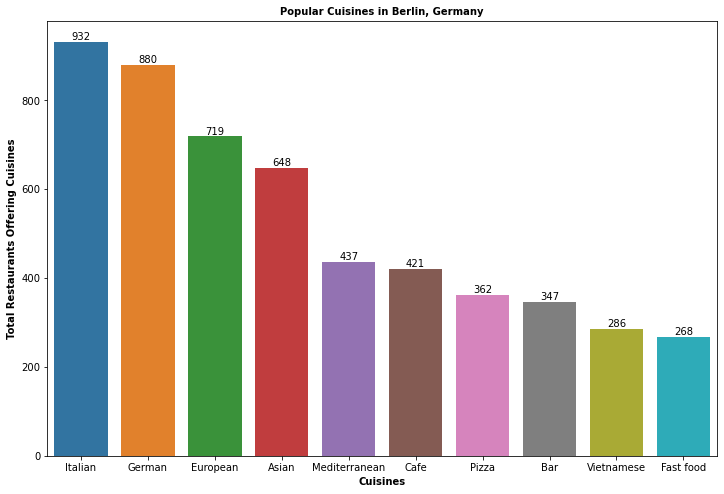

             restaurant_name  reviews  star rating
0       Cafe Couscous - Vege    133.0          5.0
1  Clubrestaurant am Wannsee    239.0          5.0
2                    happies    391.0          5.0
3                     Haveli   1417.0          4.5
4                 Hackethals   1516.0          4.5
5                Ataya Caffe    221.0          5.0
6          Ristorante A MANO   2631.0          4.5
7     Restaurant Buschbeck's    351.0          5.0
8                Burger Turm    882.0          5.0
9                Naveenapath    738.0          5.0


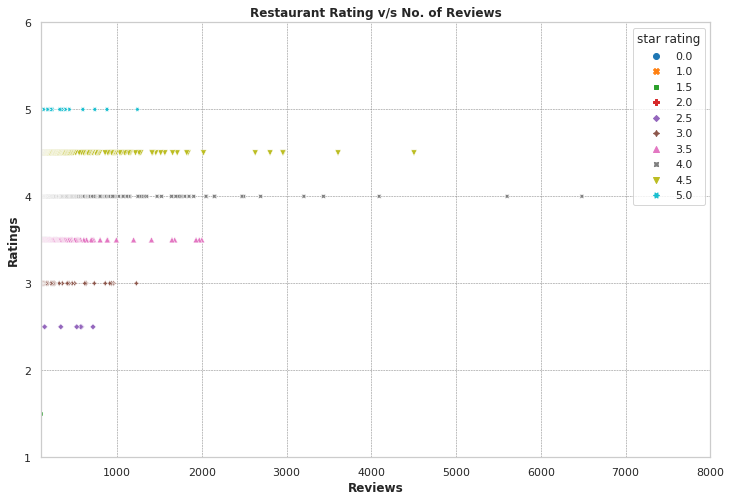

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [12, 8]

# Take the input as the scraped output
ta_restaurants = scraped_df

def clean_dataframe(df):
    # clean title, split sr_no and name
    df[['sr_no','restaurant_name']] = df["title"].str.split(" ", 1, expand=True)
    df["restaurant_name"] = df["restaurant_name"].str.strip(" ")

    # drop unnecessary columns
    df = df.drop('sr_no', axis=1)
    df = df.drop('page number', axis=1)
    df = df.drop('data offset', axis=1)

    # split cuisines
    df[['cuisine_1','cuisine_2']] = df["cuisines"].str.split(",", expand=True)
    df = df.melt(id_vars=["title", "cuisines", "reviews", "star rating", "restaurant serial number", "restaurant_name"], 
        var_name="cuisines_melt",
        value_name="cuisines_all"
        )
    # clean columns
    df["reviews"] = df["reviews"].str.replace('reviews', '').str.replace('review', '').str.replace(',', '').str.strip(" ")
    df["star rating"] = df["star rating"].str.replace(' of 5 bubbles', '').str.strip(" ")
    df["cuisines_all"] = df["cuisines_all"].str.replace('₹', '').str.replace('₹₹ - ₹₹₹', '').str.replace('-', '').str.strip(" ")
    return df

def popular_cuisines(df):
    # df_popular_cuisines = df.where(df['cuisines_all'] != '').groupby(['cuisines_all'])['restaurant_name'].nunique().sort_values(ascending=False).head(20)
    df_popular_cuisines = df.where(df['cuisines_all'] != '').groupby("cuisines_all").agg(total_restaurants_offering_cuisines=('restaurant_name', 'nunique'))
    df_popular_cuisines = df_popular_cuisines.sort_values(by = ["total_restaurants_offering_cuisines"],ascending=False).head(10)
    df_popular_cuisines['cuisines'] = df_popular_cuisines.index
    df_popular_cuisines = df_popular_cuisines.reset_index(drop=True)
    print(df_popular_cuisines.head(10))
    ax_1 = sns.barplot(data=df_popular_cuisines, x="cuisines", y="total_restaurants_offering_cuisines")
    ax_1.set_title('Popular Cuisines in Berlin, Germany', size = 14, font = 'sans', fontweight='bold')
    ax_1.set_xlabel("Cuisines", size = 10, font = 'sans', fontweight='bold')
    ax_1.set_ylabel("Total Restaurants Offering Cuisines", size = 10, font = 'sans', fontweight='bold')
    for i in ax_1.containers:
        ax_1.bar_label(i,)
    plt.show()
    return df_popular_cuisines

def scatter_plot_viz(df):
    df_subset = df[["restaurant_name","reviews","star rating"]]
    df_subset = df_subset.drop_duplicates()
    df_subset['reviews'] = df_subset['reviews'].fillna(0).astype(int)
    df_subset['star rating'] = df_subset['star rating'].fillna(0).astype(float)
    df_subset = df_subset.where(df_subset['star rating'] != -1.0)
    print(df_subset.head(10))
    sns.set( style = "whitegrid" ) 
    ax = sns.scatterplot(x="reviews",
                        y="star rating",
                        data=df_subset.sort_values("reviews", ascending= False),
                        style="star rating",
                        hue ="star rating",
                        palette = 'tab10'
                        )
    ax.set_title('Restaurant Rating v/s No. of Reviews', size = 14, font = 'sans', fontweight='bold')
    ax.set_xlabel("Reviews", size = 10, font = 'sans', fontweight='bold')
    ax.set_ylabel("Ratings", size = 10, font = 'sans', fontweight='bold')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    ax.set(xscale="linear")
    ax.set(xlim = (100,8000))
    ax.set(ylim = (1,6))
    plt.show()

ta_restaurants_clean = clean_dataframe(ta_restaurants)
print(ta_restaurants_clean.head(10))
popular_cuisines_df = popular_cuisines(ta_restaurants_clean)
scatter_plot_viz(ta_restaurants_clean)

### Summary:

<ul>
    <li><font size = 3 color=green>Inspect the structure of the website to understand the HTML tags and attributes</font></li>
    <li><font size = 3 color=green>Use Python's requests library to download the HTML content of the website</font></li>
    <li><font size = 3 color=green>Use BeautifulSoup library to parse the HTML content and extract the relevant data</font></li>
    <li><font size = 3 color=green>Store the collected data in a structured format such as CSV</font></li>
    <li><font size = 3 color=green>Performed EDA on scraped data</font></li>
</ul>

### References:

<ul>
    <li><font size = 3 color=green>Python Requests Library: https://docs.python-requests.org/en/latest/</font></li>
    <li><font size = 3 color=green>BeautifulSoup Library: https://www.crummy.com/software/BeautifulSoup/bs4/doc/</font></li>
</ul>

### Future Work:

<ul>
    <li><font size = 3 color=green>Automate the scraping process to collect data periodically for monitoring changes in restaurant information</font></li>
    <li><font size = 3 color=green>Use natural language processing techniques to analyze restaurant reviews and ratings to generate insights about customer sentiment</font></li>
    <li><font size = 3 color=green>Develop a recommendation system for restaurants based on user preferences and restaurant attributes.</font></li>
</ul>


<img src="https://i.ibb.co/X4kK80j/thats-all.jpg" width = "400" height = "400" align = "center">

In [62]:
import jovian
jovian.commit(filename='scraping-all-restaurant-listings-for-a-given-city-from-TripAdvisor-using-Python')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anshikanigam1493/scraping-restaurant-details-from-tripadvisor" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/anshikanigam1493/scraping-restaurant-details-from-tripadvisor


'https://jovian.com/anshikanigam1493/scraping-restaurant-details-from-tripadvisor'